In [2]:
#Imports
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib notebook
plt.style.use('ggplot')

In [3]:
# Read data
# Italy
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
s_url = requests.get(url).content
data_italia = pd.read_csv(io.StringIO(s_url.decode('utf-8')))
# Regioni
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
s_url = requests.get(url).content
data_regioni = pd.read_csv(io.StringIO(s_url.decode('utf-8')))
data_veneto = data_regioni.loc[data_regioni.loc[:, 'denominazione_regione']=='Veneto', :]
data_veneto = data_veneto.reset_index(drop=True)
# Province
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
s_url = requests.get(url).content
data_province = pd.read_csv(io.StringIO(s_url.decode('utf-8')))
data_verona = data_province.loc[data_province.loc[:, 'denominazione_provincia']=='Verona', ['data', 'totale_casi']]
data_verona = data_verona.reset_index(drop=True)

In [4]:
# Parse and reverse dates
def my_date(s):
    d = '-' # Delimiter
    s_ = s.split('T')[0]
    s_ = s_.split('-')
    return(datetime.datetime.strptime(s_[2]+d+s_[1]+d+s_[0], '%d'+d+'%m'+d+'%Y'))

data_italia['data'] = data_italia['data'].apply(my_date)
data_regioni['data'] = data_regioni['data'].apply(my_date)
data_veneto['data'] = data_veneto['data'].apply(my_date)
data_province['data'] = data_province['data'].apply(my_date)
data_verona['data'] = data_verona['data'].apply(my_date)

In [5]:
# Compute Verona new cases
nuovi_casi_lst = [0]
prev = 0
for new in list(data_verona.loc[1:, 'totale_casi'].values):
    nuovi_casi_lst.append(new-prev)
    prev = new
data_verona['nuovi_casi'] = nuovi_casi_lst

# Grafici dei dati

## Grafici dell'Italia

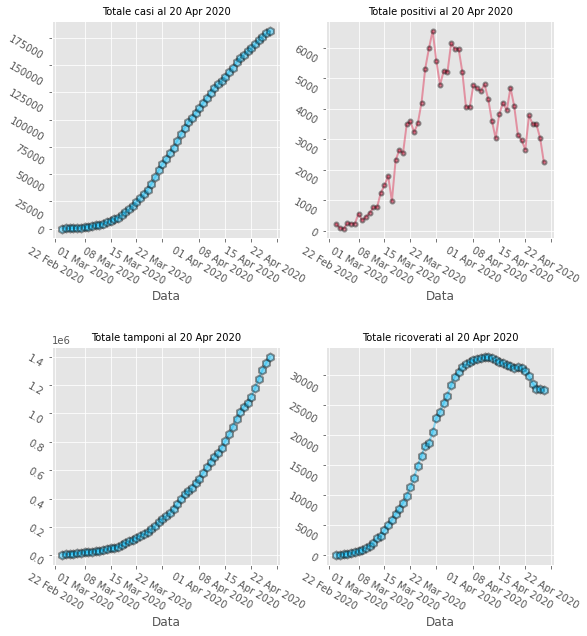

In [6]:
# Plot nazionale
last_day = data_italia['data'].max()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 10));
plt.subplots_adjust(hspace=0.5)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
ax1.plot('data', 'totale_casi', data=data_italia, lw=2, color='deepskyblue', label='Totale casi',
           marker='h', ms=8, mfc='deepskyblue', mew=2, mec='black', alpha=0.4);
ax1.tick_params(labelrotation=-30);
ax1.set_xlabel(xlabel='Data');
ax1.set_title(label='Totale casi al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
ax2.plot('data', 'nuovi_positivi', data=data_italia, lw=2, color='crimson', label='Nuovi positivi',
           marker='.', ms=8, mfc='crimson', mew=2, mec='black', alpha=0.4);
ax2.tick_params(labelrotation=-30);
ax2.set_xlabel(xlabel='Data');
ax2.set_title(label='Totale positivi al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
ax3.plot('data', 'tamponi', data=data_italia, lw=2, color='deepskyblue', label='Totale tamponi',
           marker='h', ms=8, mfc='deepskyblue', mew=2, mec='black', alpha=0.4);
ax3.tick_params(labelrotation=-30);
ax3.set_xlabel(xlabel='Data');
ax3.set_title(label='Totale tamponi al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
ax4.plot('data', 'totale_ospedalizzati', data=data_italia, lw=2, color='deepskyblue', label='Totale ospedalizzati',
           marker='h', ms=8, mfc='deepskyblue', mew=2, mec='black', alpha=0.4);
ax4.tick_params(labelrotation=-30);
ax4.set_xlabel(xlabel='Data');
ax4.set_title(label='Totale ricoverati al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
#ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
#ax4.plot('data', 'terapia_intensiva', data=data_italia, lw=2, color='deepskyblue', label='Totale terapia intensiva',
#          marker='h', ms=8, mfc='deepskyblue', mew=2, mec='black', alpha=0.4);
#ax4.tick_params(labelrotation=-30);
#ax4.set(title='Totale pazienti in terapia intensiva '+last_day.strftime('%d %b %Y'));
plt.show()

## Grafici delle regioni

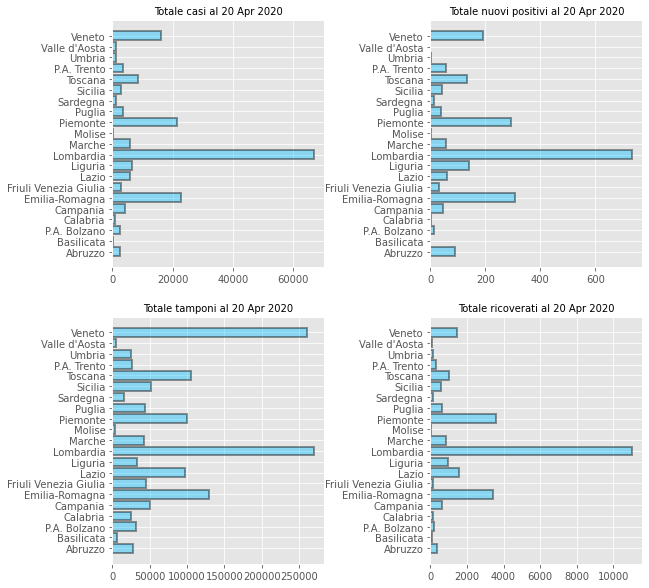

In [7]:
# Plot totali per regione
last_day = data_regioni['data'].max()
last_day_data = data_regioni[data_regioni['data']==last_day]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9.5, 10));
plt.subplots_adjust(wspace=0.5);
ax1.barh(y=last_day_data['denominazione_regione'], width=last_day_data['totale_casi'],
         fc='deepskyblue', ec='black', lw=2, alpha=0.4);
ax1.set_title(label='Totale casi al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
ax2.barh(y=last_day_data['denominazione_regione'], width=last_day_data['nuovi_positivi'],
         fc='deepskyblue', ec='black', lw=2, alpha=0.4);
ax2.set_title(label='Totale nuovi positivi al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
ax3.barh(y=last_day_data['denominazione_regione'], width=last_day_data['tamponi'],
         fc='deepskyblue', ec='black', lw=2, alpha=0.4);
ax3.set_title(label='Totale tamponi al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
ax4.barh(y=last_day_data['denominazione_regione'], width=last_day_data['totale_ospedalizzati'],
         fc='deepskyblue', ec='black', lw=2, alpha=0.4);
ax4.set_title(label='Totale ricoverati al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
plt.show()

## Grafici Veneto

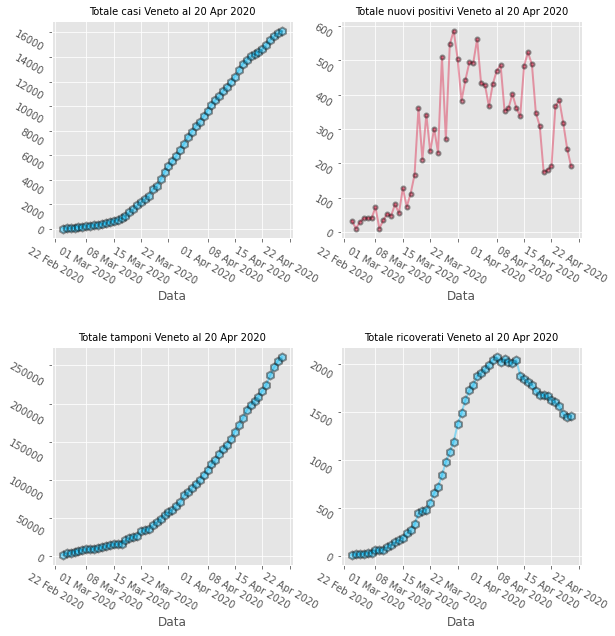

In [8]:
# Plot Veneto
last_day = data_veneto['data'].max()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9.5, 10));
plt.subplots_adjust(hspace=0.5);
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
ax1.plot('data', 'totale_casi', data=data_veneto, lw=2, color='deepskyblue', label='Totale casi',
           marker='h', ms=8, mfc='deepskyblue', mew=2, mec='black', alpha=0.4);
ax1.tick_params(labelrotation=-30);
ax1.set_xlabel(xlabel='Data');
ax1.set_title(label='Totale casi Veneto al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
ax2.plot('data', 'nuovi_positivi', data=data_veneto, lw=2, color='crimson', label='Nuovi positivi',
           marker='.', ms=8, mfc='crimson', mew=2, mec='black', alpha=0.4);
ax2.tick_params(labelrotation=-30);
ax2.set_xlabel(xlabel='Data');
ax2.set_title(label='Totale nuovi positivi Veneto al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
ax3.plot('data', 'tamponi', data=data_veneto, lw=2, color='deepskyblue', label='Totale tamponi',
           marker='h', ms=8, mfc='deepskyblue', mew=2, mec='black', alpha=0.4);
ax3.tick_params(labelrotation=-30);
ax3.set_xlabel(xlabel='Data');
ax3.set_title(label='Totale tamponi Veneto al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
ax4.plot('data', 'totale_ospedalizzati', data=data_veneto, lw=2, color='deepskyblue', label='Totale ospedalizzati',
           marker='h', ms=8, mfc='deepskyblue', mew=2, mec='black', alpha=0.4);
ax4.tick_params(labelrotation=-30);
ax4.set_xlabel(xlabel='Data');
ax4.set_title(label='Totale ricoverati Veneto al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
#ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
#ax4.plot('data', 'terapia_intensiva', data=data_veneto, lw=2, color='deepskyblue', label='Totale terapia intensiva',
#          marker='h', ms=8, mfc='deepskyblue', mew=2, mec='black', alpha=0.4);
#ax4.tick_params(labelrotation=-30);
#ax4.set(title='Totale pazienti in terapia intensiva Veneto al'+last_day.strftime('%d %b %Y'));
plt.show()

## Grafici di Verona

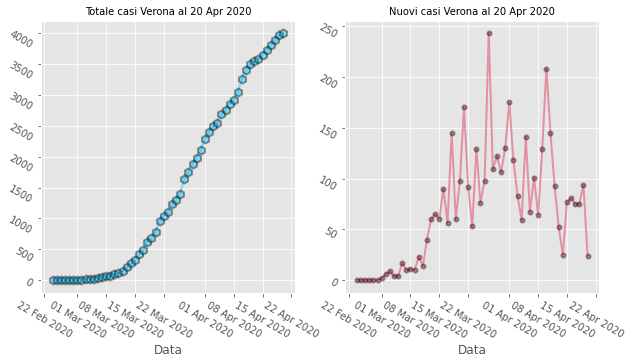

In [12]:
last_day = data_verona['data'].max()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5));
plt.subplots_adjust(hspace=0.5);
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
ax1.plot('data', 'totale_casi', data=data_verona, lw=2, color='deepskyblue', label='Totale casi',
           marker='h', ms=8, mfc='deepskyblue', mew=2, mec='black', alpha=0.4);
ax1.tick_params(labelrotation=-30);
ax1.set_xlabel(xlabel='Data');
ax1.set_title(label='Totale casi Verona al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'));
ax2.plot('data', 'nuovi_casi', data=data_verona, lw=2, color='crimson', label='Nuovi casi',
           marker='.', ms=8, mfc='crimson', mew=2, mec='black', alpha=0.4);
ax2.tick_params(labelrotation=-30);
ax2.set_xlabel(xlabel='Data');
ax2.set_title(label='Nuovi casi Verona al '+last_day.strftime('%d %b %Y'), fontdict={'fontsize':10});
plt.show()